In [1]:
from datahandler import DataHandler
import glob

from keras.models import model_from_json

from keras import models

import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import math
import cv2

import random

%matplotlib inline
plt.gray()


Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

In [40]:
img_file = 'data/kfold_data/images/10.nii'
dh = DataHandler()
img, _ = dh.getImageData(img_file)
img_slice = img[10]
img_tensor = np.expand_dims(img_slice, axis=0)

In [41]:
model_json = glob.glob('logs/unet_bn_bce_loss/kfold_unet_bn_bce_loss/*K0/*.json')
model_weights = glob.glob('logs/unet_bn_bce_loss/kfold_unet_bn_bce_loss/*K0/*.h5')

In [42]:
# Model reconstruction from JSON file
with open(model_json[0], 'r') as f:
    classifier = model_from_json(f.read())

classifier.load_weights(model_weights[0])

In [43]:
result = classifier.predict(img_tensor/255.)


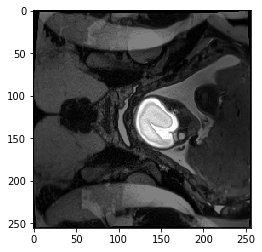

In [44]:
plt.imshow(np.squeeze(img_tensor + result * 255))